In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [78]:
df = pd.read_csv('Workbook.csv')
#df = pd.read_csv('1yearcomplete.csv')
#df.dropna()
#Index 10392 marks the end of October 2013 
import matplotlib.pyplot as plt 
input_feature= df.iloc[:,:].values
input_data = input_feature
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,1:])
myDataset = pd.DataFrame(df['sales'])
Dataset = myDataset.values
Dataset = Dataset.astype('float32')
df.date= pd.to_datetime(df.date)
df.set_index('date', inplace=True)

#plt.xlabel('Year', fontsize=20)
dataset=df

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4886 entries, 2017-01-04 to 2017-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   4886 non-null   int64
dtypes: int64(1)
memory usage: 76.3 KB


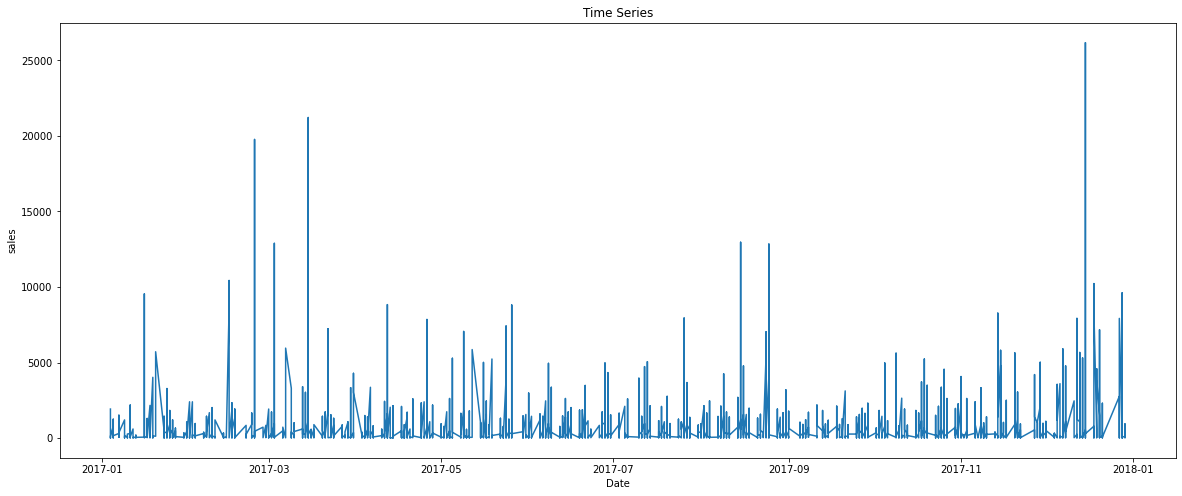

In [80]:
plt.figure(figsize=(20,8))
plt.plot(dataset)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('sales')
plt.show()

In [88]:
data1=df.values
data1=data.astype('float32')

scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(data1)

In [89]:
timestep = 30

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 850
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]    

In [90]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(Xtrain, Ytrain, epochs=200, verbose=0)

In [91]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [92]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)
Ytest= np.asanyarray(Ytest)  
Ytest= Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)
Ytrain= np.asanyarray(Ytrain)  
Ytrain= Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

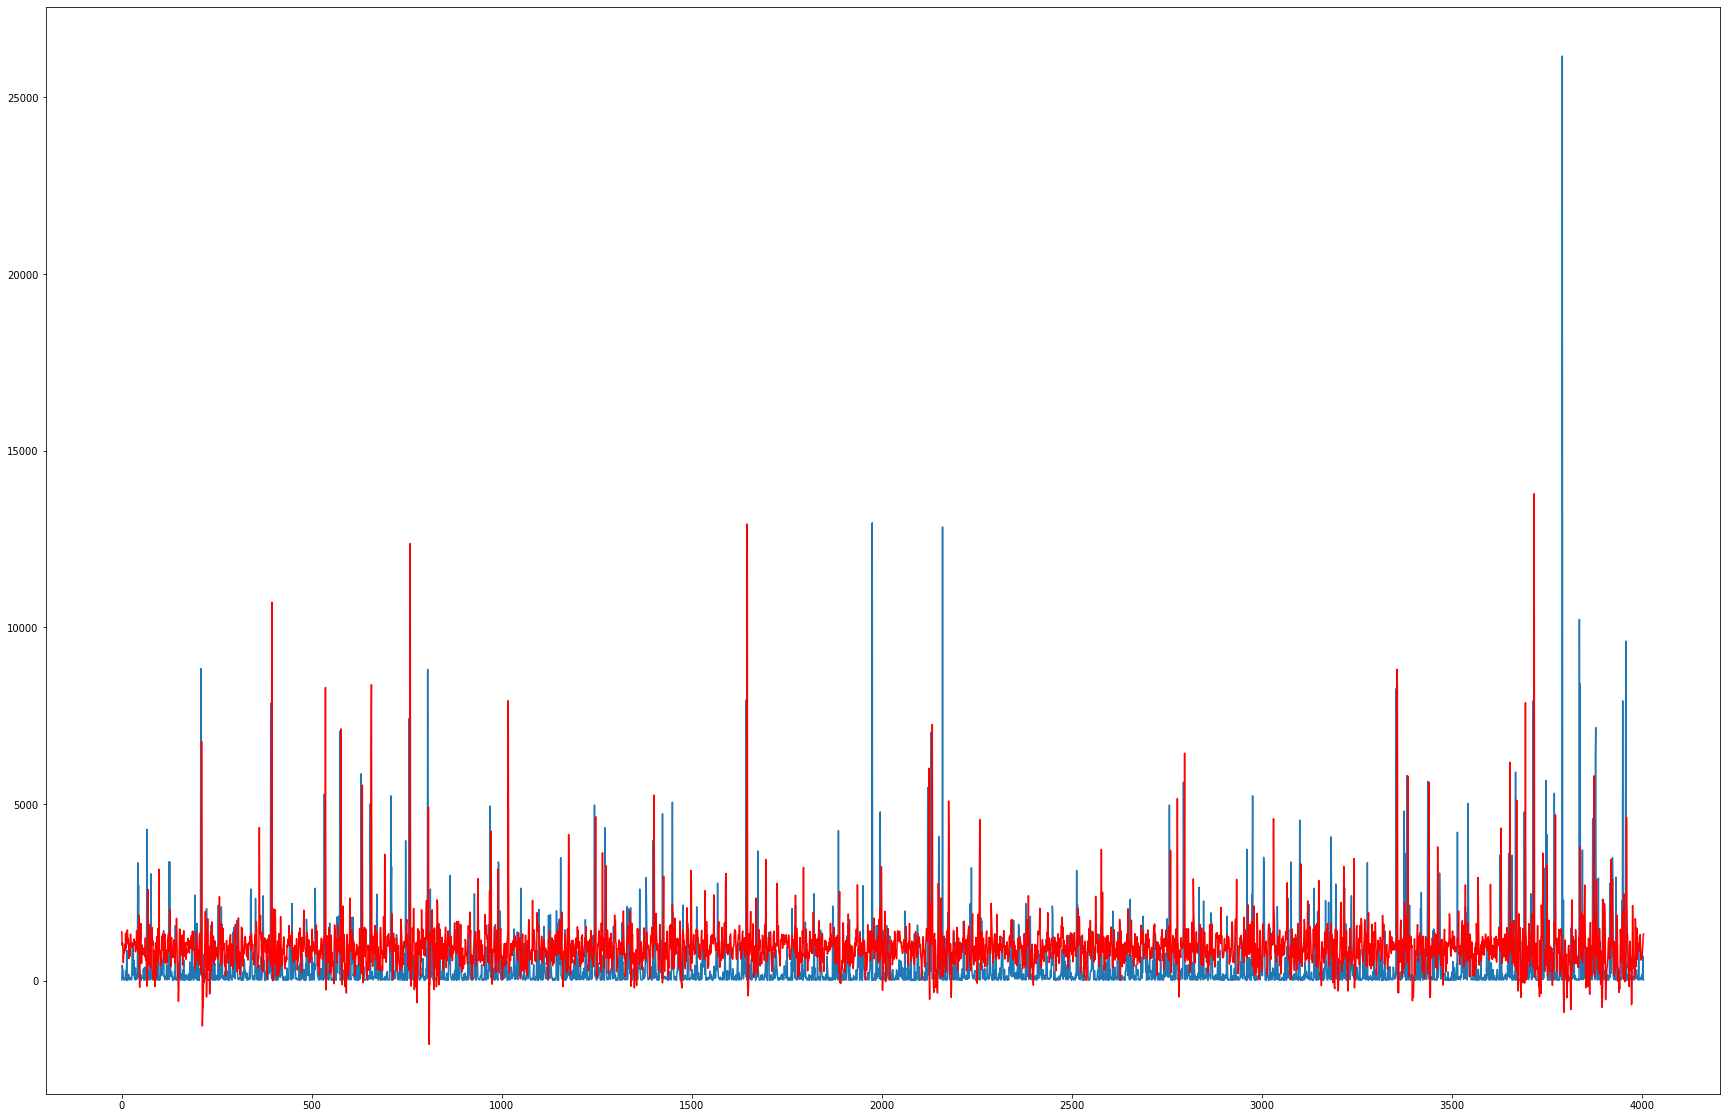

In [86]:
from matplotlib import pyplot
pyplot.figure(figsize=(30,20))
pyplot.plot(Ytest)
pyplot.plot(preds, 'r')
pyplot.show()